# Prosper Loan Data 
## by Miriam Kimani





## Investigation Overview


> My main aim for this investigation was to figure out 
>- Factors that can be used to predict default on credit.
>- Factors that influence Prosper rating.


## Dataset Overview

> My original data had 113,937 entries with 81 variables.

> However the data that I have used has 83,961 entries and 13 variables.

In [30]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [31]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [32]:
columns_used = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors']

clean_loan_data = loan_data[columns_used]
clean_loan_data = clean_loan_data.dropna(subset = ['ProsperRating (Alpha)'])
clean_loan_data.TotalProsperLoans.fillna(0, inplace=True)
clean_loan_data['LoanOriginationDate'] = pd.to_datetime(clean_loan_data['LoanOriginationDate'])
clean_loan_data.drop_duplicates(inplace=True)
clean_loan_data['EmploymentStatus'] = clean_loan_data['EmploymentStatus'].astype('category')

In [33]:
descriptive_categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other', 15: 'Medical/Dental'}
clean_loan_data['ListingCategory'] = clean_loan_data['ListingCategory (numeric)'].map(descriptive_categories)
clean_loan_data['ListingCategory'] = clean_loan_data['ListingCategory'].astype('category')
clean_loan_data.drop('ListingCategory (numeric)', axis=1, inplace=True)




## Loan Status

> This is a plot to show the distribution of loan status.

> Points to note:
>- Most loans are current and very minimal ones being past due.
>- We also have a significant amount of completed loans and defaulted loans.



In [34]:
# combine all the past due loans into one
clean_loan_data.replace(to_replace=['Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (16-30 days)','Past Due (>120 days)'],
           value='Past Due', inplace=True)
#combine the chargeoff loans with the defaulted loans
clean_loan_data.replace(to_replace='Chargedoff', value='Defaulted', inplace=True)
# combine the loans in the final payment stage with the current loans
clean_loan_data.replace(to_replace='FinalPaymentInProgress', value='Current', inplace=True)

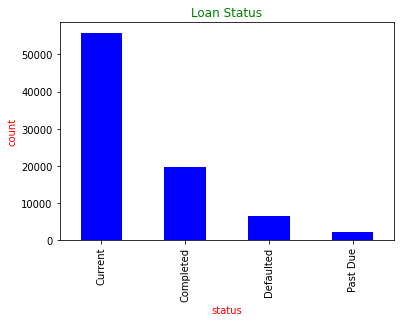

In [35]:
clean_loan_data.LoanStatus.value_counts().plot(kind='bar', color='blue')
plt.title('Loan Status', color='green');
plt.xlabel('status', color='red')
plt.ylabel('count', color='red');

## Employment Status

>- Most individuals seeking loans are employed or have businesses.
>- Very few unemployed people seek loans.


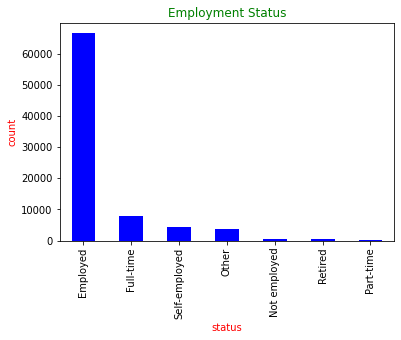

In [36]:
clean_loan_data.EmploymentStatus.value_counts().plot(kind='bar', color='blue')
plt.title('Employment Status', color='green')
plt.xlabel('status', color='red')
plt.ylabel('count', color='red');

## Loan status against Prosper rating
>- Most defaulted loans are by individuals with rating D.
>- Most completed loans are also by individuals with rating D.
>- Most current amounts are of those with rating C.
>- Past due loans have an insignificant amount in all rating categories.

In [37]:
ratings = {'ProsperRating (Alpha)': ['AA','A','B','C','D','E','HR']}

def order(dictionary):
    for var in dictionary:
        in_order = pd.api.types.CategoricalDtype(categories = dictionary[var], ordered = True)
        clean_loan_data[var] = clean_loan_data[var].astype(in_order)
        
order(ratings)

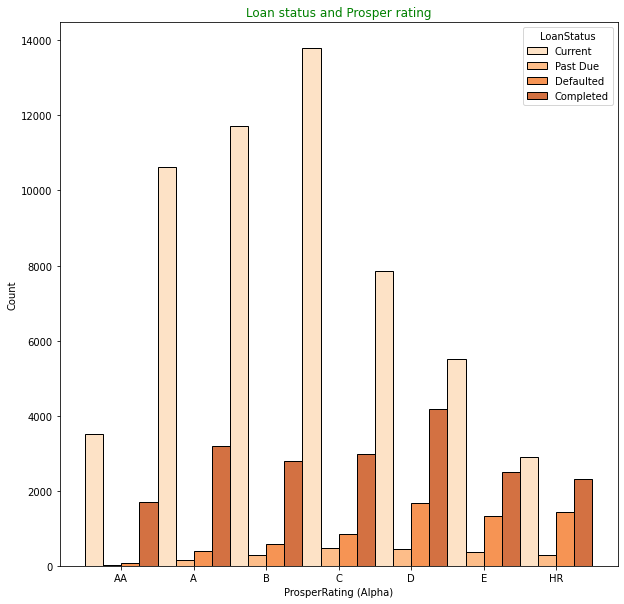

In [38]:
plt.figure(figsize=(10,10))
sns.histplot(x='ProsperRating (Alpha)', hue='LoanStatus', data=clean_loan_data, stat="count",
             multiple="dodge", palette='Oranges')
plt.title('Loan status and Prosper rating', color='green');

## Rating against Employment Status
>- Employed individuals are more in each rating category with part time employees and those retired being the least in all categories.
>- Most of the employed individuals have a rating of C.

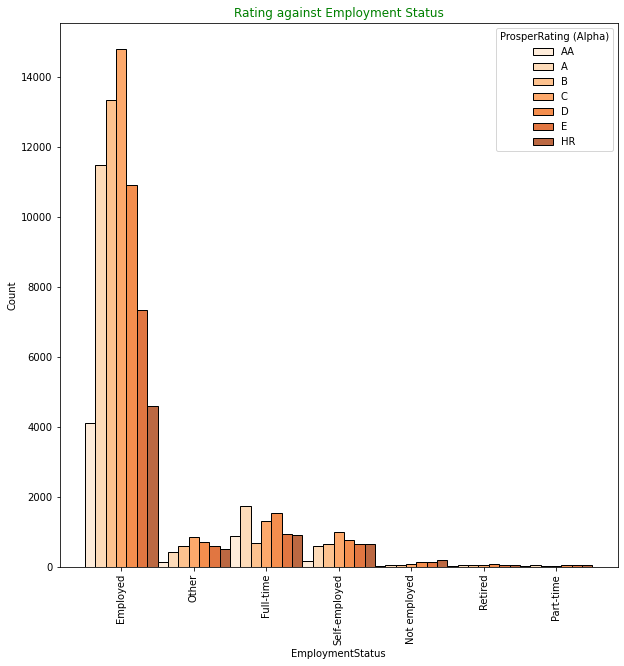

In [39]:
plt.figure(figsize=(10,10))
sns.histplot(x='EmploymentStatus', hue='ProsperRating (Alpha)', data=clean_loan_data, stat="count",
             multiple="dodge", palette='Oranges')
plt.title('Rating against Employment Status', color='green')
plt.xticks(rotation=90);

## Rating, Loan amount, Loan status
>- Large loan amounts in the top 2 rating categories are either current or past due.
>- Completed loans are the least in each rating category for all original loan amounts.

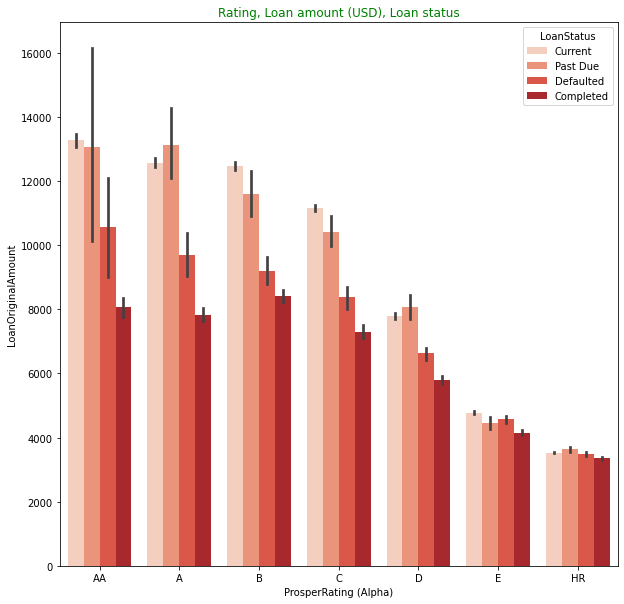

In [40]:
plt.figure(figsize=(10,10))
sns.barplot(x='ProsperRating (Alpha)', y='LoanOriginalAmount', data=clean_loan_data, 
            palette='Reds', hue='LoanStatus');
plt.title('Rating, Loan amount (USD), Loan status', color='green');


## Rating, Loan amount, Listing category
> Individuals with high Prosper ratings take the largest amounts of loans and vice versa is true.

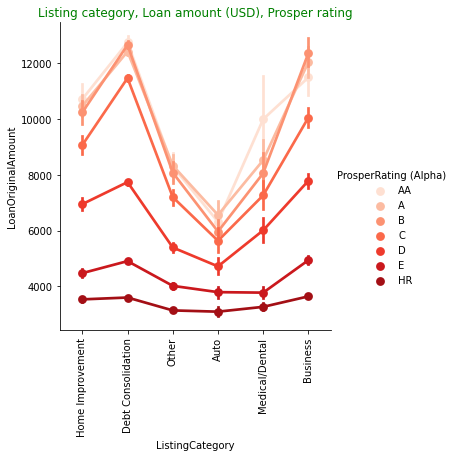

In [41]:
sns.catplot(x='ListingCategory', y='LoanOriginalAmount', data=clean_loan_data, palette='Reds', 
               kind='point',hue='ProsperRating (Alpha)');
plt.xticks(rotation=90)
plt.title('Listing category, Loan amount (USD), Prosper rating', color='green');


## Listing category, Loan amount, Loan status.
>- Large original loan amounts that are past due are in the business category.
>- Original loan amounts of that are defaulted loans are low to mid level where they spike in business category.This is similar for the completed ones.
>- Current loans are those of high original amount with the highest being in Debt consolidation.

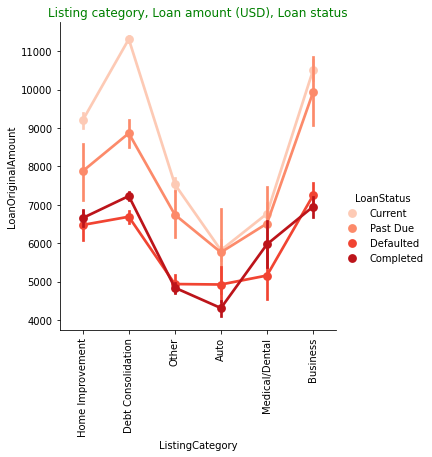

In [42]:
sns.catplot(x='ListingCategory', y='LoanOriginalAmount', data=clean_loan_data, palette='Reds', 
               kind='point',hue='LoanStatus');
plt.xticks(rotation=90)
plt.title('Listing category, Loan amount (USD), Loan status', color='green');

In [43]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 496472 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/